Connected to Python 3.9.6

In [ ]:
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
1   1610612766      Charlotte        Bobcats        CHA         2004   
2   1610612766      Charlotte        Hornets        CHA         1988   
3   1610612765        Detroit        Pistons        DET         1957   
5   1610612764     Washington        Wizards        WAS         1997   
6   1610612764     Washington    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
print(team_data_filtered.sort_values(by='teamID', ascending=True))
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
1   1610612766      Charlotte        Bobcats        CHA         2004   
2   1610612766      Charlotte        Hornets        CHA         1988   
3   1610612765        Detroit        Pistons        DET         1957   
5   1610612764     Washington        Wizards        WAS         1997   
6   1610612764     Washington    

KeyError: 'teamID'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
1   1610612766      Charlotte        Bobcats        CHA         2004   
2   1610612766      Charlotte        Hornets        CHA         1988   
3   1610612765        Detroit        Pistons        DET         1957   
5   1610612764     Washington        Wizards        WAS         1997   
6   1610612764     Washington    

KeyError: 'teamID'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
1   1610612766      Charlotte        Bobcats        CHA         2004   
2   1610612766      Charlotte        Hornets        CHA         1988   
3   1610612765        Detroit        Pistons        DET         1957   
5   1610612764     Washington        Wizards        WAS         1997   
6   1610612764     Washington    

KeyError: 'teamID'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
1   1610612766      Charlotte        Bobcats        CHA         2004   
2   1610612766      Charlotte        Hornets        CHA         1988   
3   1610612765        Detroit        Pistons        DET         1957   
5   1610612764     Washington        Wizards        WAS         1997   
6   1610612764     Washington    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Print the first few rows to check if replacements worked
print(team_data.head())

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

team_data_filtered = team_data_filtered.sort_values(by='yearFounded', ascending=False)
# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets        CHA         2014   
1  1610612766          Charlotte  Bobcats        CHA         2004   
2  1610612766          Charlotte  Hornets        CHA         1988   
3  1610612765            Detroit  Pistons        DET         1957   
4  1610612765  Ft. Wayne Zollner  Pistons        FWZ         1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
1   1610612766      Charlotte        Bobcats        CHA         2004   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
print(team_data.head())

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  


In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

team_data_filtered = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

Rows: 39, Columns: 6
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis      Grizzlies        MEM         2001   
5   1610612764     Washington        Wizards        WAS         1997   
15  1610612761        Toronto        Raptors        TOR         1995   
34  1610612750      Minnesota   Timberwolves        MIN         1989   
29  1610612753        Orlando          Magic        ORL         1989   
36  1610612748          Miami           Heat        MIA         1988   
19  1610612758     Sacramento          Kings        SAC         1985   
39  1610612746    Los Angeles       Clippers        LAC         1984   
48  1610612742         Dallas      Maverick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
# team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

team_data_filtered = team_data_filtered.sort_values(by='yearFounded', ascending=False)
# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
1   1610612766      Charlotte        Bobcats        CHA         2004   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis      Grizzlies        MEM         2001   
5   1610612764     Washington        Wizards        WAS         1997   
15  1610612761        Toronto        Raptors        TOR         1995   
29  1610612753        Orlando          Magic        ORL         1989   
34  1610612750      Minnesota   Timberwolves        MIN         1989   
36  1610612748          Miami           Heat        MIA         1988   
2   1610612766      Charlotte        Hornets        CHA         1988   
19  1610612758     Sacramento          Kings        SAC         

In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2023) | team_data['yearActiveTill'].isna()]

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

team_data_filtered = team_data_filtered.sort_values(by='yearFounded', ascending=False)
# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
1   1610612766      Charlotte        Bobcats        CHA         2004   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis      Grizzlies        MEM         2001   
5   1610612764     Washington        Wizards        WAS         1997   
15  1610612761        Toronto        Raptors        TOR         1995   
29  1610612753        Orlando          Magic        ORL         1989   
34  1610612750      Minnesota   Timberwolves        MIN         1989   
36  1610612748          Miami           Heat        MIA         1988   
2   1610612766      Charlotte        Hornets        CHA         1988   
19  1610612758     Sacramento          Kings        SAC         

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

In [ ]:
# Clean and standardize teamAbbrev
team_data['teamAbbrev'] = team_data['teamAbbrev'].str.strip().str.upper()

# Replace abbreviations, but leave CHA (Charlotte Hornets) untouched
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'SEA': 'OKC', 'NOH': 'NOP', 'NJN': 'BKN', 'NOK': 'NOP'})

# Filter team_data to keep only rows where 'yearActiveTill' >= 2023
team_data_filtered = team_data[(team_data['yearActiveTill'] >= 2000) | team_data['yearActiveTill'].isna()]

# Allowed team abbreviations
allowed_teams = [
    'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
    'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'
]

# Step 1: Filter team_data to only include teams in allowed_teams
team_data_filtered = team_data[team_data['teamAbbrev'].isin(allowed_teams)]

team_data_filtered = team_data_filtered.sort_values(by='yearFounded', ascending=False)
# Print the filtered data
print(team_data_filtered)

# Number of rows and columns in the DataFrame
print(f'Rows: {team_data_filtered.shape[0]}, Columns: {team_data_filtered.shape[1]}')

# Sort by 'yearFounded' to keep the most recent instance
team_data_sorted = team_data_filtered.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamAbbrev' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamAbbrev')

# Check the result
# team_data_filtered = team_data_filtered.sort_values(by='teamID', ascending=False)
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
1   1610612766      Charlotte        Bobcats        CHA         2004   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis      Grizzlies        MEM         2001   
5   1610612764     Washington        Wizards        WAS         1997   
15  1610612761        Toronto        Raptors        TOR         1995   
29  1610612753        Orlando          Magic        ORL         1989   
34  1610612750      Minnesota   Timberwolves        MIN         1989   
36  1610612748          Miami           Heat        MIA         1988   
2   1610612766      Charlotte        Hornets        CHA         1988   
19  1610612758     Sacramento          Kings        SAC         

In [ ]:
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets        CHA         2014   
31  1610612751       Brooklyn           Nets        BKN         2012   
16  1610612760  Oklahoma City        Thunder        OKC         2008   
50  1610612740    New Orleans        Hornets        NOP         2002   
11  1610612763        Memphis      Grizzlies        MEM         2001   
5   1610612764     Washington        Wizards        WAS         1997   
15  1610612761        Toronto        Raptors        TOR         1995   
34  1610612750      Minnesota   Timberwolves        MIN         1989   
29  1610612753        Orlando          Magic        ORL         1989   
36  1610612748          Miami           Heat        MIA         1988   
19  1610612758     Sacramento          Kings        SAC         1985   
39  1610612746    Los Angeles       Clippers        LAC         1984   
48  1610612742         Dallas      Mavericks        DAL         

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

In [ ]:
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
print(game_data.head())

     gameId             gameDate   hometeamCity hometeamName  hometeamId  \
0  22400477  2025-01-03 22:30:00    Los Angeles       Lakers  1610612747   
1  22400476  2025-01-03 22:00:00     Sacramento        Kings  1610612758   
2  22400474  2025-01-03 20:30:00         Dallas    Mavericks  1610612742   
3  22400473  2025-01-03 20:00:00  Oklahoma City      Thunder  1610612760   
4  22400471  2025-01-03 20:00:00        Houston      Rockets  1610612745   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Atlanta        Hawks  1610612737        119        102  1610612747   
1      Memphis    Grizzlies  1610612763        138        133  1610612758   
2    Cleveland    Cavaliers  1610612739        122        134  1610612739   
3     New York       Knicks  1610612752        117        107  1610612760   
4       Boston      Celtics  1610612738         86        109  1610612738   

   arenaId  attendance  gameType  tournamentRound  
0      NaN     18997.0      

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')
# Replace 'NOH' with 'NOP' for New Orleans Pelicans
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington    

<ipython-input-28-e569a0fdef18>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})


In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# replace NOH with NOP
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
56  1610612766      Charlotte        Hornets      CHA           2014   
25  1610612751       Brooklyn           Nets      BKN           2012   
40  1610612760  Oklahoma City        Thunder      OKC           2008   
6   1610612740    New Orleans        Hornets      NOH           2002   
45  1610612763        Memphis      Grizzlies      MEM           2001   
51  1610612764     Washington        Wizards      WAS           1997   
41  1610612761        Toront

<ipython-input-29-c08528e46c16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# replace NOH with NOP
team_data'teamAbbrev'] = team_data['teamAbbrev'].replace({'NOH': 'NOP'})

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

SyntaxError: invalid syntax (<ipython-input-31-2b517e3d4115>, line 4)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# replace NOH with NOP
team_data[]'teamAbbrev'] = team_data['teamAbbrev'].replace({'NOH': 'NOP'})

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

SyntaxError: invalid syntax (<ipython-input-33-10e26d855e2f>, line 4)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# replace NOH with NOP
team_data['teamAbbrev'] = team_data['teamAbbrev'].replace({'NOH': 'NOP'})

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')
# replace NOH with NOP
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington    

<ipython-input-37-e5174233d8fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})


In [ ]:
print(game_data.head())

     gameId             gameDate   hometeamCity hometeamName  hometeamId  \
0  22400477  2025-01-03 22:30:00    Los Angeles       Lakers  1610612747   
1  22400476  2025-01-03 22:00:00     Sacramento        Kings  1610612758   
2  22400474  2025-01-03 20:30:00         Dallas    Mavericks  1610612742   
3  22400473  2025-01-03 20:00:00  Oklahoma City      Thunder  1610612760   
4  22400471  2025-01-03 20:00:00        Houston      Rockets  1610612745   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Atlanta        Hawks  1610612737        119        102  1610612747   
1      Memphis    Grizzlies  1610612763        138        133  1610612758   
2    Cleveland    Cavaliers  1610612739        122        134  1610612739   
3     New York       Knicks  1610612752        117        107  1610612760   
4       Boston      Celtics  1610612738         86        109  1610612738   

   arenaId  attendance  gameType  tournamentRound  
0      NaN     18997.0      

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')
# replace NOH with NOP
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington    

<ipython-input-40-e5174233d8fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# replace NOH with NOP
team_data_sorted['teamAbbrev'] = team_data_sorted['teamAbbrev'].replace({'NOH': 'NOP'})

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Check the result to confirm the change
print(team_data.head())

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId           teamCity teamName teamAbbrev  yearFounded  \
0  1610612766          Charlotte  Hornets      CHA           2014   
1  1610612766          Charlotte  Bobcats      CHA           2004   
2  1610612766          Charlotte  Hornets      CHA           1988   
3  1610612765            Detroit  Pistons      DET           1957   
4  1610612765  Ft. Wayne Zollner  Pistons      FWZ           1948   

   yearActiveTill  
0            2100  
1            2013  
2            2001  
3            2100  
4            1956  
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# replace NOH with NOP
team_data_filtered = team_data_filtered.copy()
team_data_sorted['teamAbbrev'] = team_data_sorted['teamAbbrev'].replace({'NOH': 'NOP'})

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS

# # Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed
# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# replace NOH with NOP
team_data_filtered = team_data_filtered.copy()
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Check the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
team_data_filtered = team_data_filtered.copy()
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Do this replacement only for the team where 'teamId' corresponds to the historical NOH
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

print(game_data.head())

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
56  1610612766      Charlotte        Hornets      CHA           2014   
25  1610612751       Brooklyn           Nets      BKN           2012   
40  1610612760  Oklahoma City        Thunder      OKC           2008   
6   1610612740    New Orleans        Hornets        NOP         2002   
45  1610612763        Memphis      Grizzlies      MEM           2001   
51  1610612764     Washington        Wizards      WAS           1997   
41  1610612761        Toronto        Raptors      TOR           1995   
22  1610612750      Minnesota   Timberwolves      MIN           1989   
27  1610612753        Orlando          Magic      ORL           1989   
20  1610612748          Miami           Heat      MIA           1988   
37  1610612758     Sacramento          Kings      SAC           1985   
17  1610612746    Los Angeles       Clippers      LAC           1984   
8   1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
team_data_filtered = team_data_filtered.copy()
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))
Í

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

NameError: name 'Í' is not defined

In [ ]:
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Do this replacement only for the team where 'teamId' corresponds to the historical NOH
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = "NOP"
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'


# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

print(game_data.head())

: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

team_data = team_data_reversed

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
team_data_filtered = team_data_filtered.copy()
team_data_filtered['teamAbbrev'] = team_data_filtered['teamAbbrev'].replace({'NOH': 'NOP'})

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))
Í

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans        Hornets      NOH           2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

NameError: name 'Í' is not defined

In [ ]:
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Do this replacement only for the team where 'teamId' corresponds to the historical NOH
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'


# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

print(game_data.head())

: 

In [ ]:
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

print(game_data.head())

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
56  1610612766      Charlotte        Hornets      CHA           2014   
25  1610612751       Brooklyn           Nets      BKN           2012   
40  1610612760  Oklahoma City        Thunder      OKC           2008   
6   1610612740    New Orleans       Pelicans        NOP         2002   
45  1610612763        Memphis      Grizzlies      MEM           2001   
51  1610612764     Washington        Wizards      WAS           1997   
41  1610612761        Toronto        Raptors      TOR           1995   
22  1610612750      Minnesota   Timberwolves      MIN           1989   
27  1610612753        Orlando          Magic      ORL           1989   
20  1610612748          Miami           Heat      MIA           1988   
37  1610612758     Sacramento          Kings      SAC           1985   
17  1610612746    Los Angeles       Clippers      LAC           1984   
8   1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
print(game_data.head())
print(team_data_filtered.dtypes)

     gameId             gameDate   hometeamCity hometeamName  hometeamId  \
0  22400477  2025-01-03 22:30:00    Los Angeles       Lakers  1610612747   
1  22400476  2025-01-03 22:00:00     Sacramento        Kings  1610612758   
2  22400474  2025-01-03 20:30:00         Dallas    Mavericks  1610612742   
3  22400473  2025-01-03 20:00:00  Oklahoma City      Thunder  1610612760   
4  22400471  2025-01-03 20:00:00        Houston      Rockets  1610612745   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Atlanta        Hawks  1610612737        119        102  1610612747   
1      Memphis    Grizzlies  1610612763        138        133  1610612758   
2    Cleveland    Cavaliers  1610612739        122        134  1610612739   
3     New York       Knicks  1610612752        117        107  1610612760   
4       Boston      Celtics  1610612738         86        109  1610612738   

   arenaId  attendance  gameType  tournamentRound  
0      NaN     18997.0      

In [ ]:
print(game_data.head())

     gameId             gameDate   hometeamCity hometeamName  hometeamId  \
0  22400477  2025-01-03 22:30:00    Los Angeles       Lakers  1610612747   
1  22400476  2025-01-03 22:00:00     Sacramento        Kings  1610612758   
2  22400474  2025-01-03 20:30:00         Dallas    Mavericks  1610612742   
3  22400473  2025-01-03 20:00:00  Oklahoma City      Thunder  1610612760   
4  22400471  2025-01-03 20:00:00        Houston      Rockets  1610612745   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Atlanta        Hawks  1610612737        119        102  1610612747   
1      Memphis    Grizzlies  1610612763        138        133  1610612758   
2    Cleveland    Cavaliers  1610612739        122        134  1610612739   
3     New York       Knicks  1610612752        117        107  1610612760   
4       Boston      Celtics  1610612738         86        109  1610612738   

   arenaId  attendance  gameType  tournamentRound  
0      NaN     18997.0      

In [ ]:
# Assuming the table is in a DataFrame named `game_data`

# Step 1: Convert 'gameDate' to just year, month, and day (YYYY-MM-DD)
game_data['gameDate'] = pd.to_datetime(game_data['gameDate']).dt.strftime('%Y-%m-%d')

# Step 2: Add a new column for point differential (homeScore - awayScore)
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Step 3: Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-5]

# Verify the result
print(game_data_filtered.head())

print(game_data.head())

ValueError: time data "1955-01-03" doesn't match format "%Y-%m-%d %H:%M:%S", at position 28573. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Assuming 'game_data' is your DataFrame

# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-5]

# Verify the result
print(game_data_filtered.head())

     gameId    gameDate   hometeamCity hometeamName  hometeamId awayteamCity  \
0  22400477  2025-01-03    Los Angeles       Lakers  1610612747      Atlanta   
1  22400476  2025-01-03     Sacramento        Kings  1610612758      Memphis   
2  22400474  2025-01-03         Dallas    Mavericks  1610612742    Cleveland   
3  22400473  2025-01-03  Oklahoma City      Thunder  1610612760     New York   
4  22400471  2025-01-03        Houston      Rockets  1610612745       Boston   

  awayteamName  awayteamId  homeScore  awayScore      winner  
0        Hawks  1610612737        119        102  1610612747  
1    Grizzlies  1610612763        138        133  1610612758  
2    Cavaliers  1610612739        122        134  1610612739  
3       Knicks  1610612752        117        107  1610612760  
4      Celtics  1610612738         86        109  1610612738  


In [ ]:
# Assuming 'game_data' is your DataFrame

# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]

# Verify the result
print(game_data_filtered.head())

     gameId    gameDate   hometeamCity hometeamName  hometeamId awayteamCity  \
0  22400477  2025-01-03    Los Angeles       Lakers  1610612747      Atlanta   
1  22400476  2025-01-03     Sacramento        Kings  1610612758      Memphis   
2  22400474  2025-01-03         Dallas    Mavericks  1610612742    Cleveland   
3  22400473  2025-01-03  Oklahoma City      Thunder  1610612760     New York   
4  22400471  2025-01-03        Houston      Rockets  1610612745       Boston   

  awayteamName  awayteamId  homeScore  awayScore  
0        Hawks  1610612737        119        102  
1    Grizzlies  1610612763        138        133  
2    Cavaliers  1610612739        122        134  
3       Knicks  1610612752        117        107  
4      Celtics  1610612738         86        109  


In [ ]:
# Assuming 'game_data' is your DataFrame

# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Verify the result
print(game_data_filtered.head())

     gameId    gameDate   hometeamCity hometeamName  hometeamId awayteamCity  \
0  22400477  2025-01-03    Los Angeles       Lakers  1610612747      Atlanta   
1  22400476  2025-01-03     Sacramento        Kings  1610612758      Memphis   
2  22400474  2025-01-03         Dallas    Mavericks  1610612742    Cleveland   
3  22400473  2025-01-03  Oklahoma City      Thunder  1610612760     New York   
4  22400471  2025-01-03        Houston      Rockets  1610612745       Boston   

  awayteamName  awayteamId  homeScore  awayScore  pointDifferential  
0        Hawks  1610612737        119        102                 17  
1    Grizzlies  1610612763        138        133                  5  
2    Cavaliers  1610612739        122        134                -12  
3       Knicks  1610612752        117        107                 10  
4      Celtics  1610612738         86        109                -23  


In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

# Verify the result
print(clutch.head())

      gameId    gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469  2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465  2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439  2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436  2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434  2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential  
6       Hornets  1610612766         98         94                  4  
10         Nets  1610612751        110        113                 -3  
29         Heat  1610612748        100        104                 -4  
32         Nets  1610612751        102        101                  1  
34    Mavericks  1610612742        126        122                  4  


In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Verify the result
print(clutch.head())

AttributeError: 'str' object has no attribute 'year'

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch = clutch.copy()
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Verify the result
print(clutch.head())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch = clutch.copy()
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Verify the result
print(clutch.tail())

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
62649  24600278      NaT  Philadelphia     Warriors  1610612744      New York   
62650  24600211      NaT        Boston      Celtics  1610612738      New York   
62657  24600149      NaT        Boston      Celtics  1610612738      New York   
62658  24600119      NaT        Boston      Celtics  1610612738  Philadelphia   
62663  24600063      NaT      New York       Knicks  1610612752  Philadelphia   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
62649       Knicks  1610612752         59         61                 -2   
62650       Knicks  1610612752         49         48                  1   
62657       Knicks  1610612752         66         62                  4   
62658     Warriors  1610612744         60         63                 -3   
62663     Warriors  1610612744         64         60                  4   

       season  
62649  nan-an  
62650  nan-an  
62657  nan-an 

<ipython-input-70-3fcec76ba67d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch = clutch.copy()
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

<ipython-input-75-d4138283d235>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])


In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Replace 'teamId' with 'teamAbbrev' using the mapping
team_data_filtered['teamAbbrev'] = team_data_filtered['teamId'].map(team_data_filtered.set_index('teamId')['teamAbbrev'])

# Verify the result
print(team_data_filtered[['teamId', 'teamAbbrev']])

        teamId teamAbbrev
0   1610612766      CHA  
31  1610612751      BKN  
16  1610612760      OKC  
50  1610612740        NOP
11  1610612763      MEM  
5   1610612764      WAS  
15  1610612761      TOR  
34  1610612750      MIN  
29  1610612753      ORL  
36  1610612748      MIA  
19  1610612758      SAC  
39  1610612746      LAC  
48  1610612742      DAL  
13  1610612762      UTA  
47  1610612743      DEN  
28  1610612754      IND  
18  1610612759      SAN  
44  1610612744      GSW  
42  1610612745      HOU  
51  1610612739      CLE  
24  1610612757      POR  
53  1610612737      ATL  
25  1610612756      PHX  
35  1610612749      MIL  
49  1610612741      CHI  
26  1610612755      PHI  
37  1610612747      LAL  
3   1610612765      DET  
30  1610612752      NYK  
52  1610612738      BOS  


<ipython-input-80-2a78df35d635>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamId'].map(team_data_filtered.set_index('teamId')['teamAbbrev'])


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
# Replace 'teamId' with 'teamAbbrev' using the mapping
team_data_filtered['teamAbbrev'] = team_data_filtered['teamId'].map(team_data_filtered.set_index('teamId')['teamAbbrev'])

# Verify the result
print(team_data_filtered[['teamId', 'teamAbbrev']])


# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['teamAbbrev'] = table['teamId'].map(team_id_to_abbrev)

# Check the result
print(table)

        teamId teamAbbrev
0   1610612766      CHA  
31  1610612751      BKN  
16  1610612760      OKC  
50  1610612740        NOP
11  1610612763      MEM  
5   1610612764      WAS  
15  1610612761      TOR  
34  1610612750      MIN  
29  1610612753      ORL  
36  1610612748      MIA  
19  1610612758      SAC  
39  1610612746      LAC  
48  1610612742      DAL  
13  1610612762      UTA  
47  1610612743      DEN  
28  1610612754      IND  
18  1610612759      SAN  
44  1610612744      GSW  
42  1610612745      HOU  
51  1610612739      CLE  
24  1610612757      POR  
53  1610612737      ATL  
25  1610612756      PHX  
35  1610612749      MIL  
49  1610612741      CHI  
26  1610612755      PHI  
37  1610612747      LAL  
3   1610612765      DET  
30  1610612752      NYK  
52  1610612738      BOS  


<ipython-input-87-fdeaee36e3b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['teamAbbrev'] = team_data_filtered['teamId'].map(team_data_filtered.set_index('teamId')['teamAbbrev'])


KeyError: 'teamId'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['teamAbbrev'] = table['teamID'].map(team_id_to_abbrev)

# Check the result
print(table)

KeyError: 'teamID'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Check the result
print(table)

KeyError: 'awayteamId'

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Check the result
print(table)

KeyError: 'awayteamId'

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned['season'] >= "2000-01"

# Check the result
print(table)

6         True
10        True
29        True
32        True
34        True
         ...  
61312    False
61314    False
61315    False
61326    False
61327    False
Name: season, Length: 13992, dtype: bool


In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Check the result
print(table)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
28457  20000025 2000-11-03        Denver        Nuggets  1610612743   
28465  20000018 2000-11-02     Cleveland      Cavaliers  1610612739   
28471  20000011 2000-11-01  Golden State       Warriors  1610612744   
28476  20000007 2000-11-01        Dallas      Mavericks  1610612742   
28481  20000002 2000-11-01    New Jersey           Nets  1610612751   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6         Charlotte      Hornets  1610612766         98         94   
10     

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

<ipython-input-118-5f7d6aed2347>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-118-5f7d6aed2347>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())


# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Check the result
print(table)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
28457  20000025 2000-11-03        Denver        Nuggets  1610612743   
28465  20000018 2000-11-02     Cleveland      Cavaliers  1610612739   
28471  20000011 2000-11-01  Golden State       Warriors  1610612744   
28476  20000007 2000-11-01        Dallas      Mavericks  1610612742   
28481  20000002 2000-11-01    New Jersey           Nets  1610612751   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6         Charlotte      Hornets  1610612766         98         94   
10     

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


# Check the result
print(table)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
28457  20000025 2000-11-03        Denver        Nuggets  1610612743   
28465  20000018 2000-11-02     Cleveland      Cavaliers  1610612739   
28471  20000011 2000-11-01  Golden State       Warriors  1610612744   
28476  20000007 2000-11-01        Dallas      Mavericks  1610612742   
28481  20000002 2000-11-01    New Jersey           Nets  1610612751   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6         Charlotte      Hornets  1610612766         98         94   
10     

<ipython-input-125-753a20dfea69>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-125-753a20dfea69>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Check the result
print(table)
# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


# Check the result
print(table)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
28457  20000025 2000-11-03        Denver        Nuggets  1610612743   
28465  20000018 2000-11-02     Cleveland      Cavaliers  1610612739   
28471  20000011 2000-11-01  Golden State       Warriors  1610612744   
28476  20000007 2000-11-01        Dallas      Mavericks  1610612742   
28481  20000002 2000-11-01    New Jersey           Nets  1610612751   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6         Charlotte      Hornets  1610612766         98         94   
10     

<ipython-input-126-9916b07b3bc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-126-9916b07b3bc0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='pointDifferential'>0, aggfunc='count', fill_value=0)

# Check the result
print(pt)

<ipython-input-133-029c10903e80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-133-029c10903e80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

In [ ]:
#Filter for seasons since 2000 and make heatmap for combined (then wins / losses, should be easy)
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values=int('pointDifferential')>0, aggfunc='count', fill_value=0)

# Check the result
print(pt)

<ipython-input-140-367fdfe7762a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-140-367fdfe7762a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)


ValueError: invalid literal for int() with base 10: 'pointDifferential'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

<ipython-input-147-d9bebc3281e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-147-d9bebc3281e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)
<ipython-input-147-d9bebc3281e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

<ipython-input-163-d9bebc3281e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
<ipython-input-163-d9bebc3281e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)
<ipython-input-163-d9bebc3281e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
1610612766: 'CHA',  # Charlotte Hornets
1610612751: 'BKN',  # Brooklyn Nets
1610612760: 'OKC',  # Oklahoma City Thunder
1610612740: 'NOP',  # New Orleans Pelicans
1610612763: 'MEM',  # Memphis Grizzlies
1610612764: 'WAS',  # Washington Wizards
1610612761: 'TOR',  # Toronto Raptors
1610612750: 'MIN',  # Minnesota Timberwolves
1610612753: 'ORL',  # Orlando Magic
1610612748: 'MIA',  # Miami Heat
1610612747: 'LAL',  # Los Angeles Lakers
1610612745: 'HOU',  # Houston Rockets
1610612743: 'DEN',  # Denver Nuggets
1610612752: 'NYK',  # New York Knicks
1610612754: 'IND',  # Indiana Pacers
1610612749: 'MIL',  # Milwaukee Bucks
1610612755: 'PHX',  # Phoenix Suns
1610612757: 'POR',  # Portland Trail Blazers
1610612762: 'UTA',  # Utah Jazz
1610612739: 'CLE',  # Cleveland Cavaliers
1610612765: 'DET',  # Detroit Pistons
1610612738: 'BOS',  # Boston Celtics
1610612744: 'GSW',  # Golden State Warriors
1610612756: 'SAC',  # Sacramento Kings
1610612737: 'ATL',  # Atlanta Hawks
1610612746: 'LAC',  # Los Angeles Clippers
1610612741: 'CHI',  # Chicago Bulls
1610612742: 'DAL',  # Dallas Mavericks
1610612758: 'SAS',  # San Antonio Spurs
1610612740: 'NOP',  # New Orleans Pelicans (duplicate key fixed)
1610612759: 'OKC',  # Oklahoma City Thunder (duplicate key fixed)
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAS',  # San Antonio Spurs
    1610612759: 'OKC',  # Oklahoma City Thunder
    1610612760: 'NOP',  # New Orleans Pelicans
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAS',  # San Antonio Spurs
    1610612759: 'OKC',  # Oklahoma City Thunder
    1610612760: 'NOP',  # New Orleans Pelicans
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAS',  # San Antonio Spurs
    1610612759: 'OKC',  # Oklahoma City Thunder
    1610612760: 'NOP',  # New Orleans Pelicans
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAS',  # San Antonio Spurs
    1610612759: 'OKC',  # Oklahoma City Thunder
    1610612760: 'NOP',  # New Orleans Pelicans
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612760: 'NOP'
1610612752: 'NYK'
1610612759: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2000-01  2001-02  2002-03  2003-04  2004-05  2005-06  2006-07  \
awayteamAbbrev                                                                  
ATL                   5        8        9        3        9       13        9   
BKN                   8       10       10       11        9       12       17   
BOS                  14        9       10       14        8       15       10   
CHA                  11        4        0        0        8       10        7   
CHI                   6        8        8        5       10       10       12   
CLE                   5        6        6        5        7       16       18   
DAL                   9        7       11       15       10       11       14   
DEN                   6        8        6        9       11       13        8   
DET                   4       10       16       12       12       11       14   
GSW                   5        6        8        6       11       13       13   
HOU                   8     

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(table)

# Output the result
print(adjusted_df)

NameError: name 'adjust_charlotte_data' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_charlotte_data(dataframe):
    """
    Adjusts the dataset so that CHA (1610612766) is displayed as '-' for seasons 2003 and 2004
    but treated as NaN for calculations.
    
    Parameters:
    dataframe (pd.DataFrame): The input DataFrame containing team IDs and seasons.
    
    Returns:
    pd.DataFrame: The updated DataFrame.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Replace CHA's values for the target seasons
    mask = (dataframe['teamId'] == cha_team_id) & (dataframe['season'].isin(target_seasons))
    dataframe.loc[mask, 'teamAbbrev'] = '-'
    dataframe.loc[mask, 'teamId'] = np.nan  # Treat as NaN for calculations
    
    return dataframe

# Example dataset
data = {
    'teamId': [1610612766, 1610612747, 1610612766, 1610612737],
    'teamAbbrev': ['CHA', 'LAL', 'CHA', 'ATL'],
    'season': ['2002-03', '2003-04', '2003-04', '2004-05'],
    'pointDifferential': [5, 10, -2, 8]
}

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(table)

# Output the result
print(adjusted_df)

KeyError: 'teamId'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_charlotte_data(dataframe):
    """
    Adjusts the dataset so that CHA (1610612766) is displayed as '-' for seasons 2003 and 2004
    but treated as NaN for calculations.
    
    Parameters:
    dataframe (pd.DataFrame): The input DataFrame containing team IDs and seasons.
    
    Returns:
    pd.DataFrame: The updated DataFrame.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Replace CHA's values for the target seasons
    mask = (dataframe['awayteamId'] == cha_team_id) & (dataframe['season'].isin(target_seasons))
    dataframe.loc[mask, 'teamAbbrev'] = '-'
    dataframe.loc[mask, 'teamId'] = np.nan  # Treat as NaN for calculations

    mask = (dataframe['awayteamId'] == cha_team_id) & (dataframe['season'].isin(target_seasons))
    dataframe.loc[mask, 'teamAbbrev'] = '-'
    dataframe.loc[mask, 'teamId'] = np.nan  # Treat as NaN for calculations

    
    return dataframe

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(table)

# Output the result
print(adjusted_df)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
26043  20200042 2002-11-03   Los Angeles       Clippers  1610612746   
26057  20200028 2002-11-02       Phoenix           Suns  1610612756   
26069  20200016 2002-10-31   Los Angeles       Clippers  1610612746   
26080  20200005 2002-10-31  Philadelphia          76ers  1610612755   
26081  20200004 2002-10-31        Boston        Celtics  1610612738   

      awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6        Charlotte      Hornets  1610612766         98         94   
10       

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
import pandas as pd
import numpy as np

def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(table)

# Output the result
print(adjusted_df)

         gameId   gameDate  hometeamCity   hometeamName  hometeamId  \
6      22400469 2025-01-03       Detroit        Pistons  1610612765   
10     22400465 2025-01-02     Milwaukee          Bucks  1610612749   
29     22400439 2024-12-29       Houston        Rockets  1610612745   
32     22400436 2024-12-29       Orlando          Magic  1610612753   
34     22400434 2024-12-28      Portland  Trail Blazers  1610612757   
...         ...        ...           ...            ...         ...   
26043  20200042 2002-11-03   Los Angeles       Clippers  1610612746   
26057  20200028 2002-11-02       Phoenix           Suns  1610612756   
26069  20200016 2002-10-31   Los Angeles       Clippers  1610612746   
26080  20200005 2002-10-31  Philadelphia          76ers  1610612755   
26081  20200004 2002-10-31        Boston        Celtics  1610612738   

      awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
6        Charlotte      Hornets  1610612766         98         94   
10       

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt['2012-13'])

awayteamAbbrev
ATL    2
BKN    4
BOS    0
CHA    0
CHI    1
CLE    1
DAL    0
DEN    3
DET    0
GSW    3
HOU    1
IND    2
LAC    0
LAL    0
MEM    7
MIA    0
MIL    0
MIN    0
NOP    1
NYK    2
OKC    3
ORL    1
PHI    0
PHX    0
POR    0
SAC    0
SAS    4
TOR    1
UTA    2
WAS    2
Name: 2012-13, dtype: int64


In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)

KeyError: 'awayteamId'

In [ ]:
df = pd.DataFrame(pt)

# Set the 'season' column as the index
df.set_index('season', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Team Abbreviation')
plt.ylabel('Season')

# Show the plot
plt.tight_layout()
plt.show()

KeyError: "None of ['season'] are in the columns"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
df = pd.DataFrame(table)

# Set the 'season' column as the index
df.set_index('season', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Team Abbreviation')
plt.ylabel('Season')

# Show the plot
plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='awayteamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Check the result
print(pt)

season          2002-03  2003-04  2004-05  2005-06  2006-07  2007-08  2008-09  \
awayteamAbbrev                                                                  
ATL                   9        3        9       13        9        6       12   
BKN                  10       11        9       12       17        9       12   
BOS                  10       14        8       15       10       11       13   
CHA                   0        0        8       10        7        7       14   
CHI                   8        5       10       10       12        5       15   
CLE                   6        5        7       16       18       14        8   
DAL                  11       15       10       11       14       13        6   
DEN                   6        9       11       13        8       12       15   
DET                  16       12       12       11       14       11       12   
GSW                   8        6       11       13       13        5        6   
HOU                   9     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
# Apply the function
adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)

KeyError: 'awayteamId'

In [ ]:
df = pd.DataFrame(table)

# Set the 'season' column as the index
df.set_index('season', inplace=True)

# Create the heatmap with seasons on the x-axis and teams on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(df.T, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Season')
plt.ylabel('Team Abbreviation')

plt.tight_layout()
plt.show()

: 

In [ ]:
df = pd.DataFrame(table)

# Set the 'season' column as the index
df.set_index('season', inplace=True)

# Create the heatmap with seasons on the x-axis and teams on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(df.T, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Season')
plt.ylabel('Team Abbreviation')

plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 1200x1000 with 0 Axes>

ValueError: Unknown format code 'd' for object of type 'float'

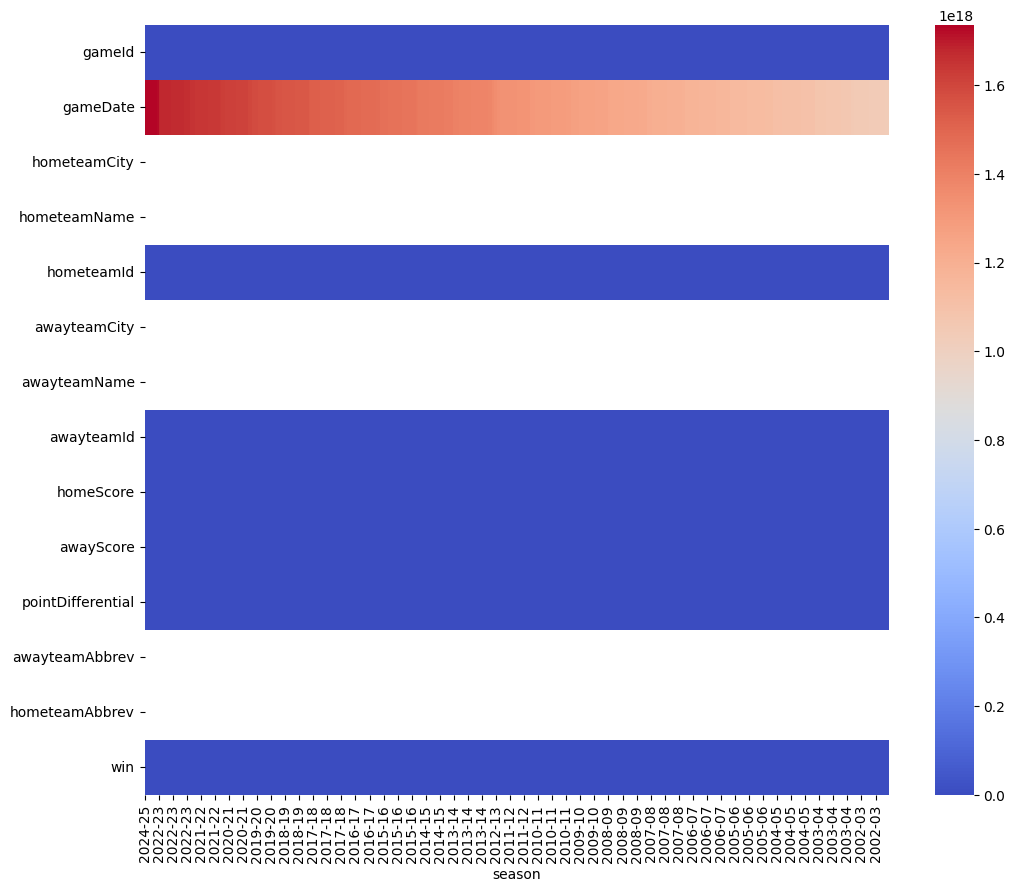

In [ ]:
df = pd.DataFrame(table)

# Set the 'season' column as the index
df.set_index('season', inplace=True)

# Ensure the DataFrame only contains numerical values
df = df.apply(pd.to_numeric, errors='coerce')

# Create the heatmap with seasons on the x-axis and teams on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(df.T, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Season')
plt.ylabel('Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

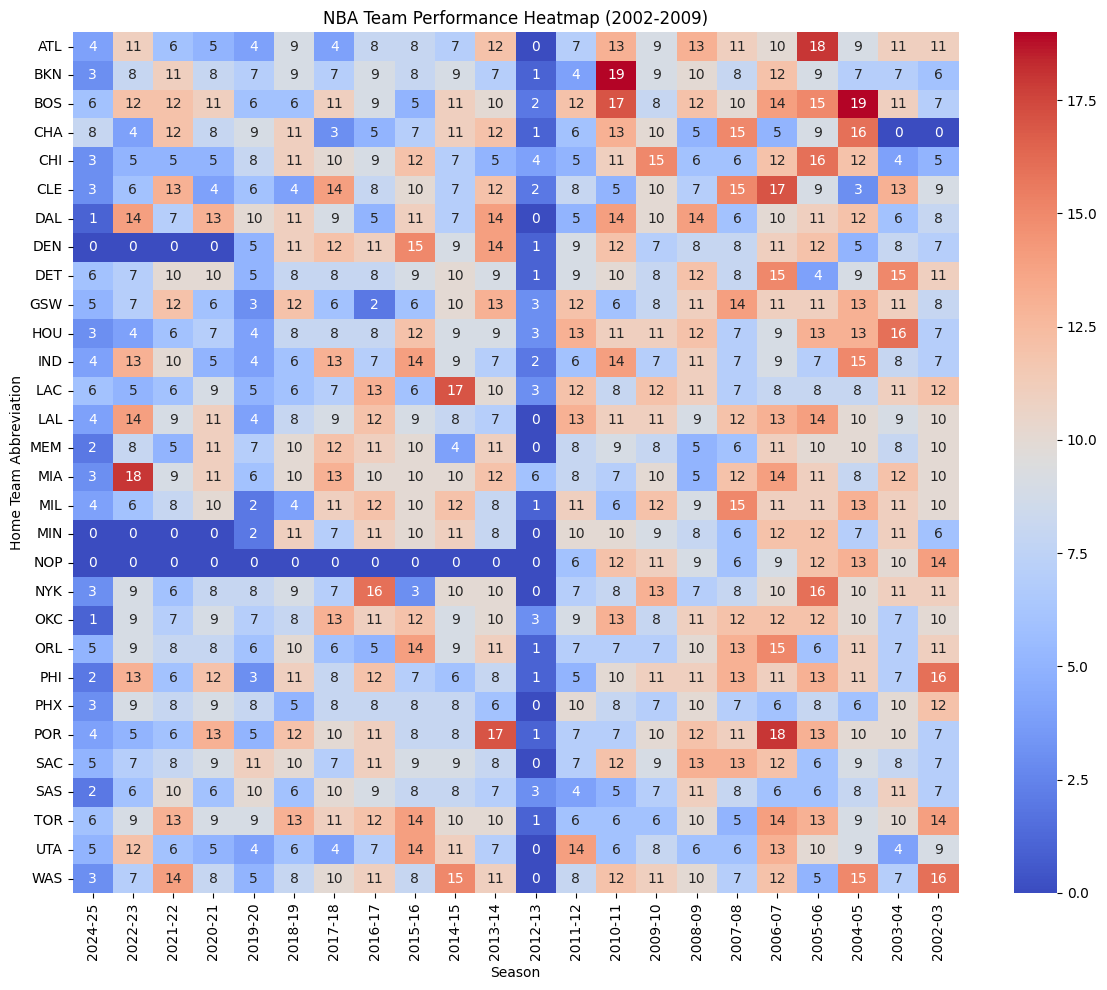

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Performance Heatmap (2002-2009)')
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

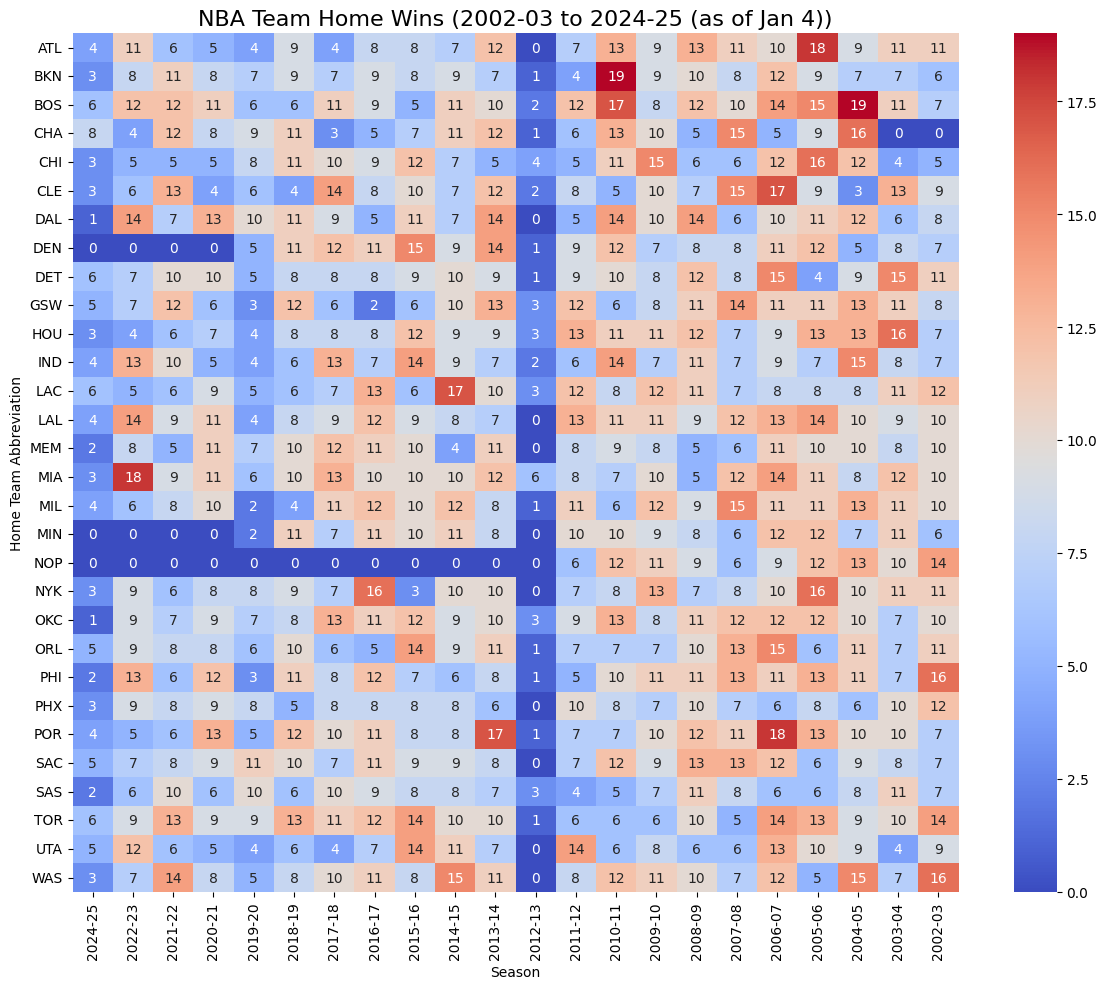

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Home Wins (2002-03 to 2024-25 (as of Jan 4))', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toronto        Raptors      TOR           1995   
34  1610612750      Minnesota   Timberwolves      MIN           1989   
29  1610612753        Orlando          Magic      ORL           1989   
36  1610612748          Miami           Heat      MIA           1988   
19  1610612758     Sacramento          Kings      SAC           1985   
39  1610612746    Los Angeles       Clippers      LAC           1984   
48  1610612742         Dallas      Mavericks      DAL           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data_sorted)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId           teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766          Charlotte        Hornets      CHA           2014   
31  1610612751           Brooklyn           Nets      BKN           2012   
16  1610612760      Oklahoma City        Thunder      OKC           2008   
1   1610612766          Charlotte        Bobcats      CHA           2004   
50  1610612740        New Orleans        Hornets      NOH           2002   
11  1610612763            Memphis      Grizzlies      MEM           2001   
5   1610612764         Washington        Wizards      WAS           1997   
15  1610612761            Toronto        Raptors      TOR           1995   
12  1610612763          Vancouver      Grizzlies      VAN           1995   
34  1610612750          Minnesota   Timberwolves      MIN           1989   
29  1610612753            Orlando          Magic      ORL           1989   
36  1610612748              Miami           Heat      MIA           1988   
2   16106127

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data_sorted)

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

        teamId           teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766          Charlotte        Hornets      CHA           2014   
31  1610612751           Brooklyn           Nets      BKN           2012   
16  1610612760      Oklahoma City        Thunder      OKC           2008   
1   1610612766          Charlotte        Bobcats      CHA           2004   
50  1610612740        New Orleans        Hornets      NOH           2002   
11  1610612763            Memphis      Grizzlies      MEM           2001   
5   1610612764         Washington        Wizards      WAS           1997   
15  1610612761            Toronto        Raptors      TOR           1995   
12  1610612763          Vancouver      Grizzlies      VAN           1995   
34  1610612750          Minnesota   Timberwolves      MIN           1989   
29  1610612753            Orlando          Magic      ORL           1989   
36  1610612748              Miami           Heat      MIA           1988   
2   16106127

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data[teamName == 'Pelicans'])

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

NameError: name 'teamName' is not defined

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
print

<function print>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
pwd

'/Users/reese/code/nba/250104_nba'

In [ ]:
ls

Games.csv          TeamHistories.csv  main.py            main_1.py


In [ ]:
open TeamHistories.csv



SyntaxError: invalid syntax (<ipython-input-350-3815bee5de35>, line 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity   hometeamName  hometeamId awayteamCity  \
6   22400469 2025-01-03      Detroit        Pistons  1610612765    Charlotte   
10  22400465 2025-01-02    Milwaukee          Bucks  1610612749     Brooklyn   
29  22400439 2024-12-29      Houston        Rockets  1610612745        Miami   
32  22400436 2024-12-29      Orlando          Magic  1610612753     Brooklyn   
34  22400434 2024-12-28     Portland  Trail Blazers  1610612757       Dallas   

   awayteamName  awayteamId  homeScore  awayScore  pointDifferential   season  
6       Hornets  1610612766         98         94                  4  2024-25  
10         Nets  1610612751        110        113                 -3  2024-25  
29         Heat  1610612748        100        104                 -4  2024-25  
32         Nets  1610612751        102        101                  1  2024-25  
34    Mavericks  1610612742        126        122                  4  2024-25  
         gameId   gameDate       homete

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2002-03"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

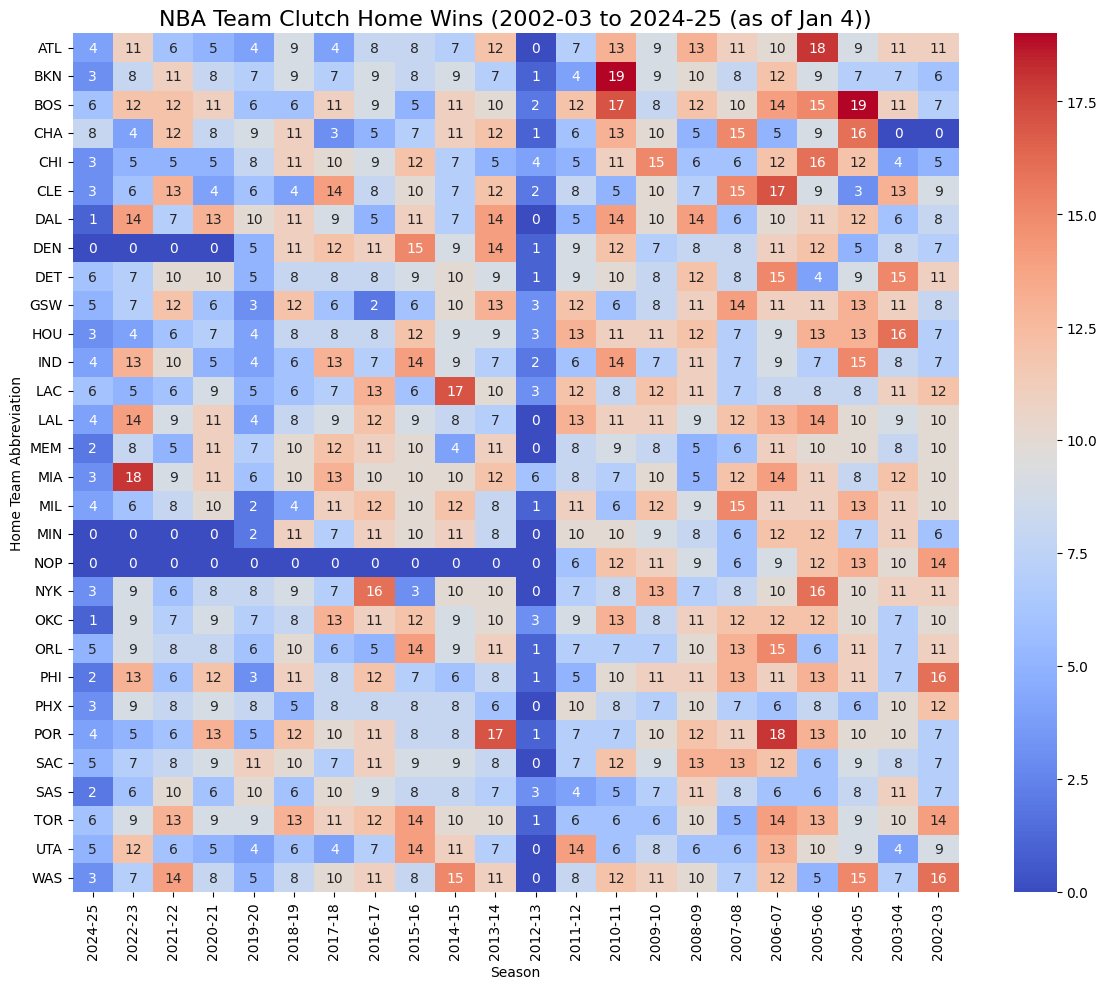

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2002-03 to 2024-25 (as of Jan 4))', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing??

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2003-04"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
35   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
55   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
147  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
292  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
324  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
35         76ers  1610612755        111        114                 -3   
55         76ers  1610612755        114        118                 -4   
147        Magic  1610612753        102        106                 -4   
292      Hornets  1610612766        107        105                  2   
324        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
35   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       11        6        5        4        9        4   
BKN                   3        8       11        8        7        9        7   
BOS                   6       12       12       11        6        6       11   
CHA                   8        4       12        8        9       11        3   
CHI                   3        5        5        5        8       11       10   
CLE                   3        6       13        4        6        4       14   
DAL                   1       14        7       13       10       11        9   
DEN                   0        0        0        0        5       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        7       12        6        3       12        6   
HOU                   3     

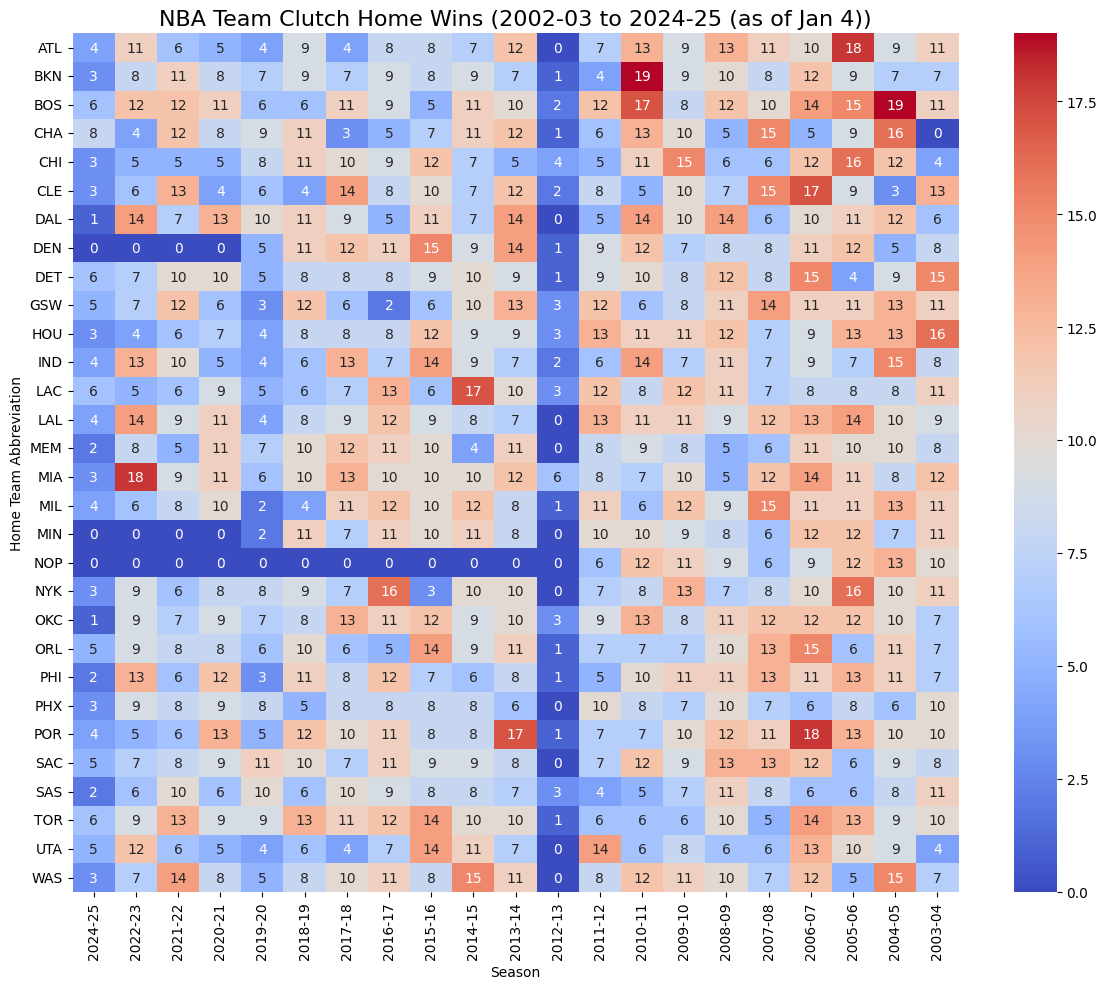

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2002-03 to 2024-25 (as of Jan 4))', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

Connected to Python 3.9.6

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2001-02"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

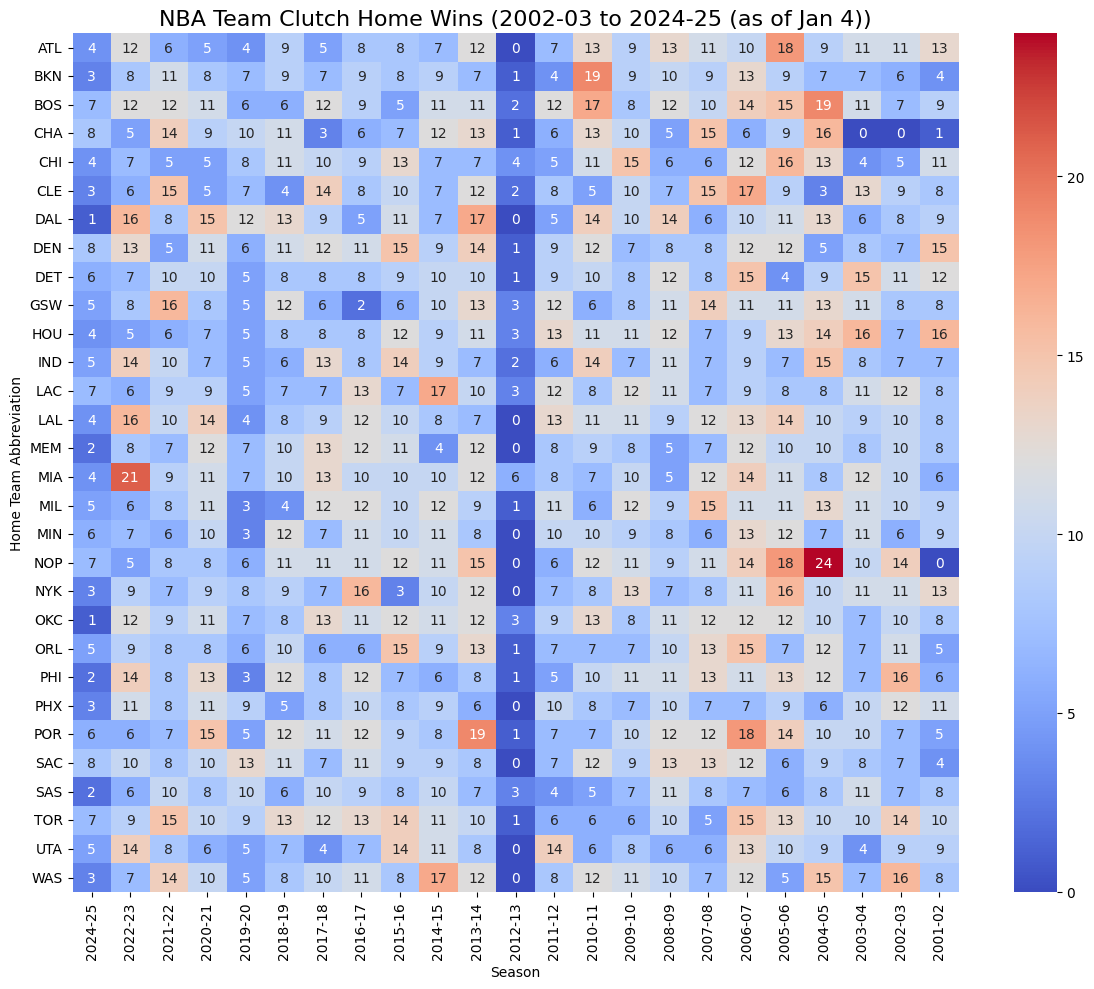

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2002-03 to 2024-25 (as of Jan 4))', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2000-01"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

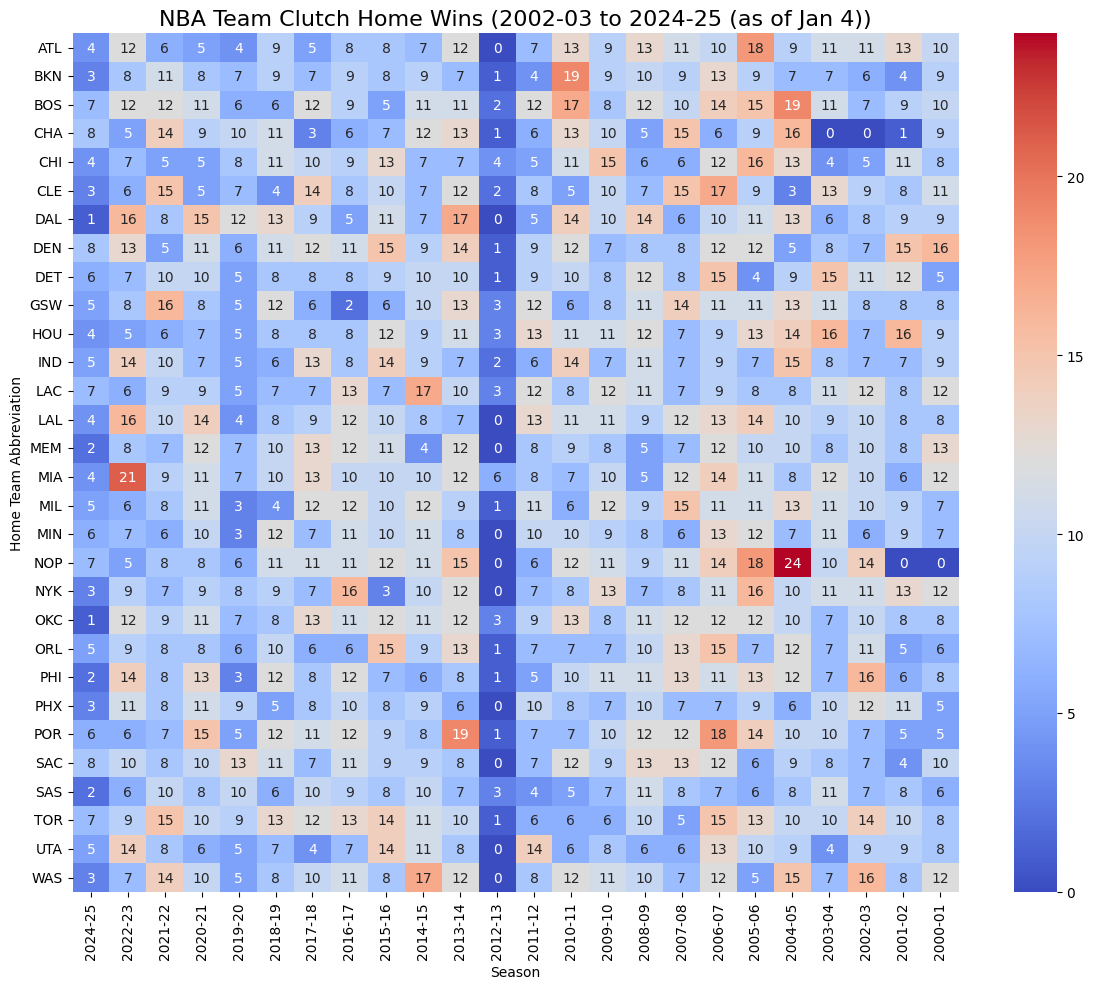

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2002-03 to 2024-25 (as of Jan 4))', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

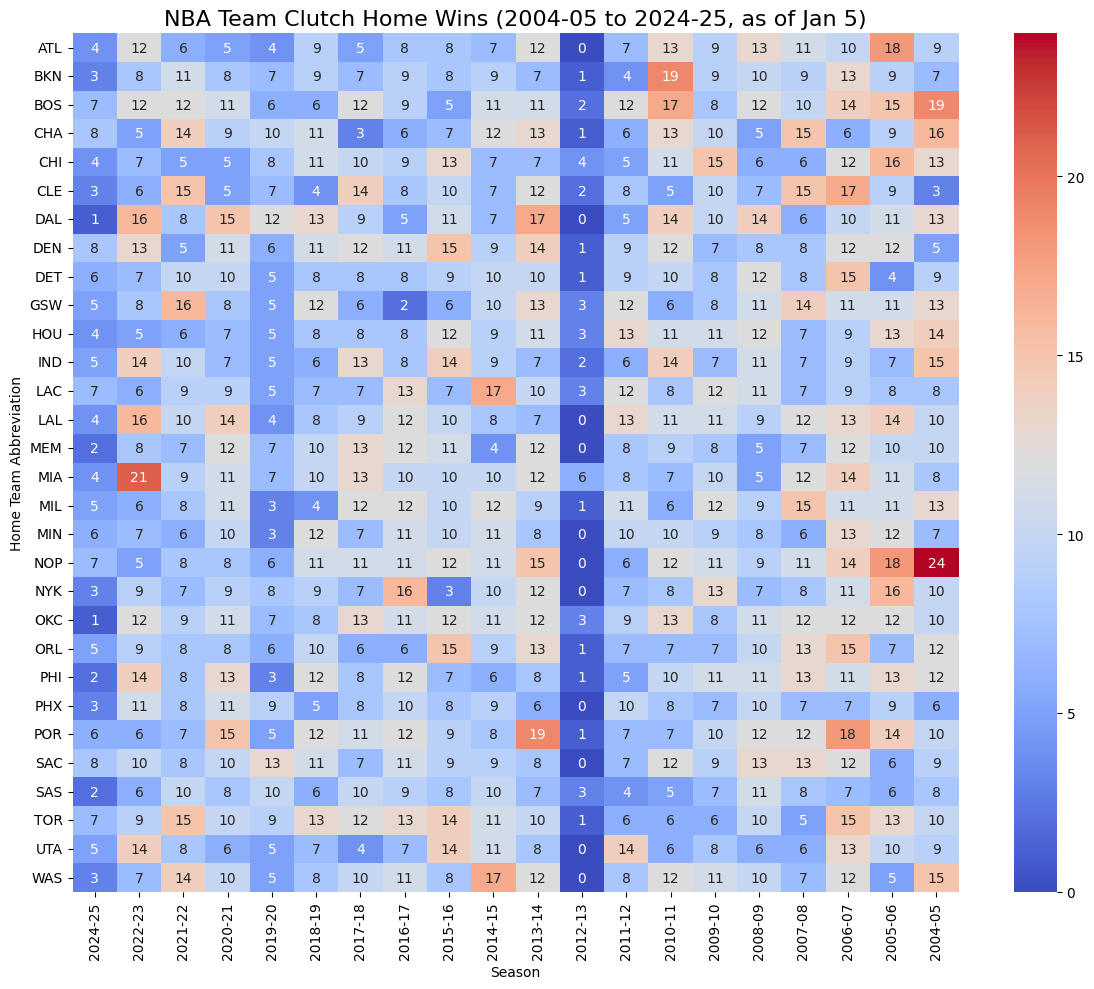

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)

# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

ValueError: Unknown format code 'd' for object of type 'float'

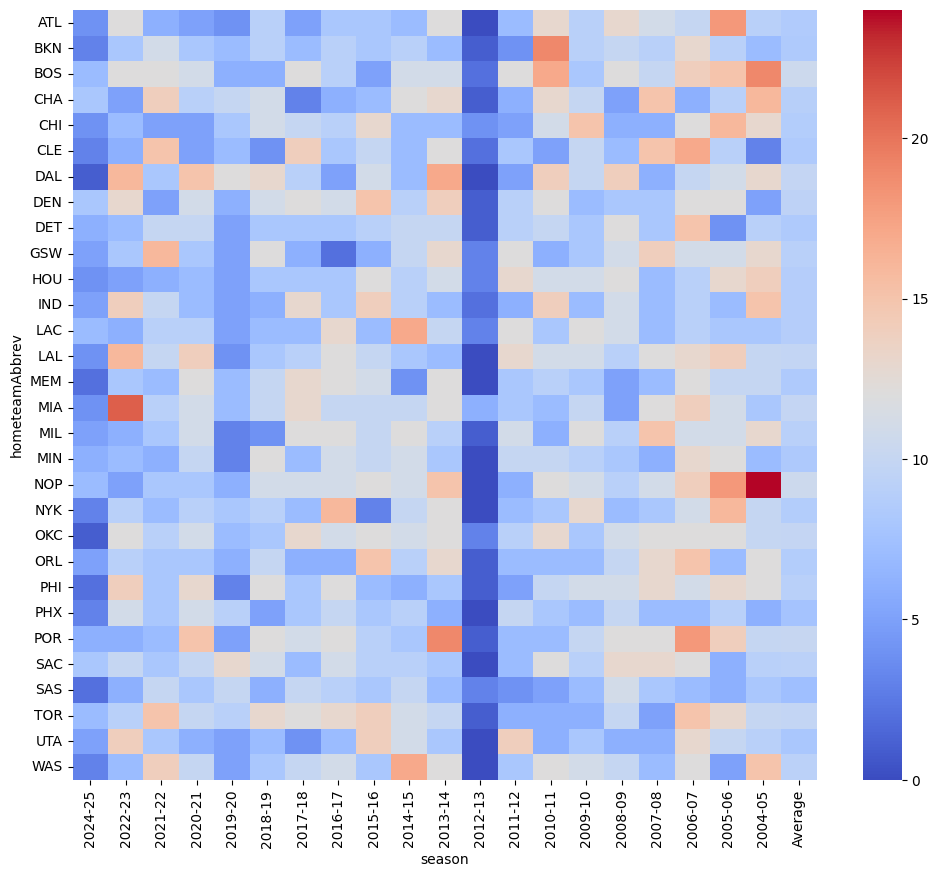

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = [int]pt.mean(axis=1)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

SyntaxError: invalid syntax (<ipython-input-36-cb2160f00d7a>, line 5)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

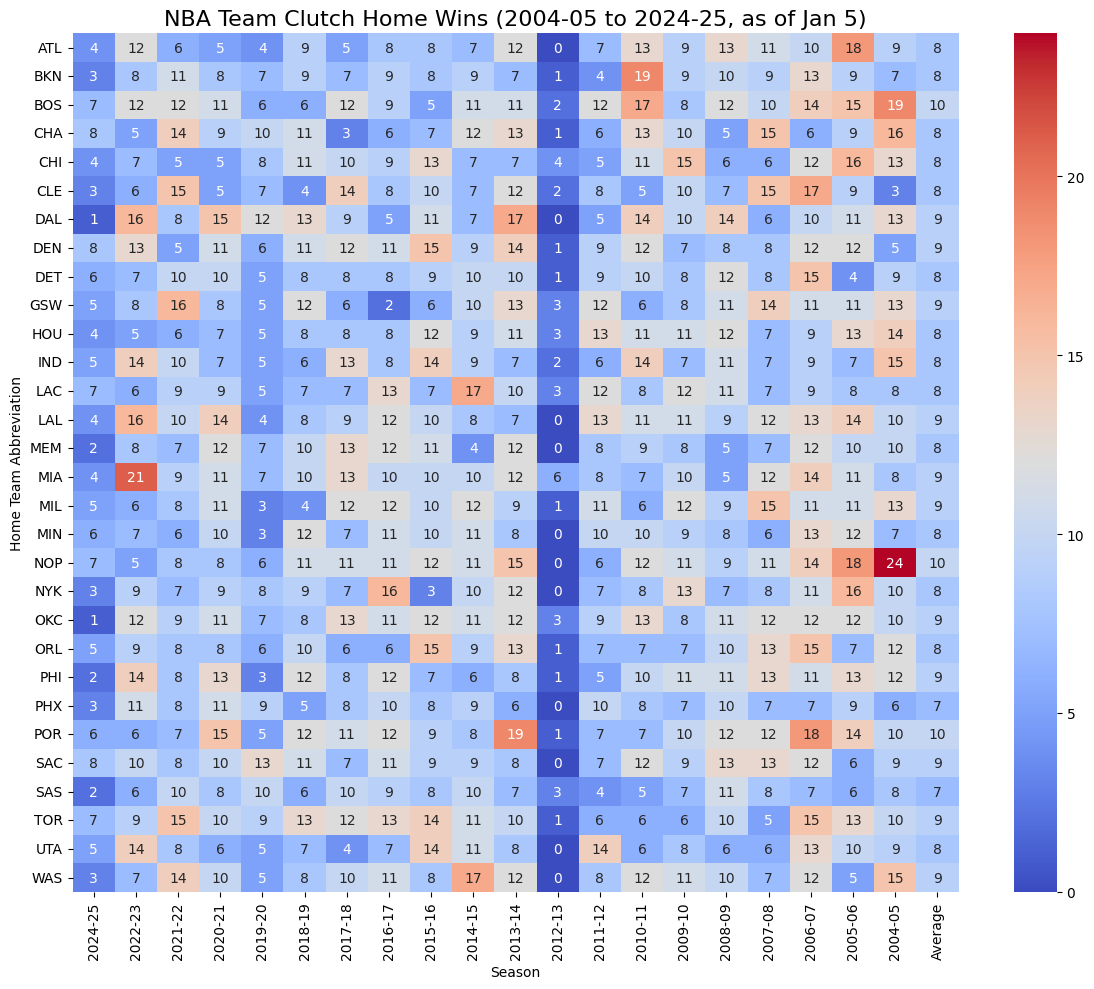

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.head())

Number of rows for the 2012-13 season: 40
         gameId   gameDate hometeamCity hometeamName  hometeamId awayteamCity  \
14102  41200406 2013-06-19        Miami         Heat  1610612748  San Antonio   
14107  41200401 2013-06-07        Miami         Heat  1610612748  San Antonio   
14115  41200302 2013-05-25        Miami         Heat  1610612748      Indiana   
14116  41200301 2013-05-23        Miami         Heat  1610612748      Indiana   
14117  41200312 2013-05-22  San Antonio        Spurs  1610612759      Memphis   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
14102        Spurs  1610612759        103        100                  3   
14107        Spurs  1610612759         88         92                 -4   
14115       Pacers  1610612754         93         97                 -4   
14116       Pacers  1610612754        103        102                  1   
14117    Grizzlies  1610612763         93         89                  4   

        season awayt

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

Number of rows for the 2012-13 season: 40
         gameId   gameDate  hometeamCity hometeamName  hometeamId  \
14281  11200019 2012-10-11       Houston      Rockets  1610612745   
14282  11200023 2012-10-10       Detroit      Pistons  1610612765   
14284  11200015 2012-10-10       Chicago        Bulls  1610612741   
14286  11200013 2012-10-09  Golden State     Warriors  1610612744   
14291  11200005 2012-10-07   Los Angeles     Clippers  1610612746   

        awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
14281  Oklahoma City      Thunder  1610612760        107        105   
14282        Toronto      Raptors  1610612761        101         99   
14284        Memphis    Grizzlies  1610612763         92         88   
14286           Utah         Jazz  1610612762         83         80   
14291         Denver      Nuggets  1610612743        104        106   

       pointDifferential   season awayteamAbbrev hometeamAbbrev  win  
14281                  2  2012-13            

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012 = season_2012_data['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season: {total_home_wins_2012}")

Number of rows for the 2012-13 season: 40
         gameId   gameDate  hometeamCity hometeamName  hometeamId  \
14281  11200019 2012-10-11       Houston      Rockets  1610612745   
14282  11200023 2012-10-10       Detroit      Pistons  1610612765   
14284  11200015 2012-10-10       Chicago        Bulls  1610612741   
14286  11200013 2012-10-09  Golden State     Warriors  1610612744   
14291  11200005 2012-10-07   Los Angeles     Clippers  1610612746   

        awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
14281  Oklahoma City      Thunder  1610612760        107        105   
14282        Toronto      Raptors  1610612761        101         99   
14284        Memphis    Grizzlies  1610612763         92         88   
14286           Utah         Jazz  1610612762         83         80   
14291         Denver      Nuggets  1610612743        104        106   

       pointDifferential   season awayteamAbbrev hometeamAbbrev  win  
14281                  2  2012-13            

In [ ]:
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

KeyError: 'season'

In [ ]:
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

KeyError: 'season'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

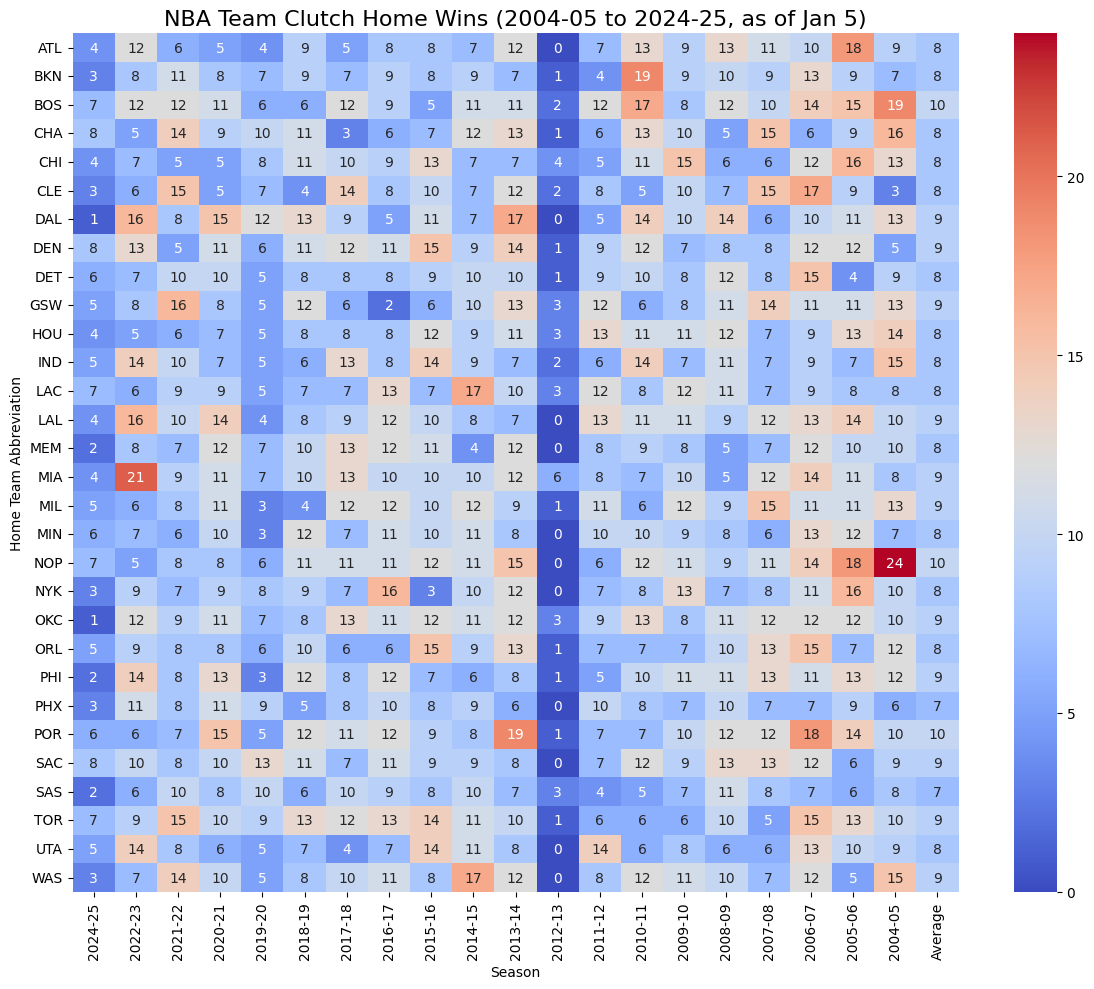

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

KeyError: 'season'

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012 = season_2012_data['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season: {total_home_wins_2012}")

: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.
""" # %%
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-65-caaf59cad518>, line 44)

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012 = season_2012_data['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season: {total_home_wins_2012}")

: 

In [ ]:
"""

: 

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.
""" # %%
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-66-caaf59cad518>, line 44)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

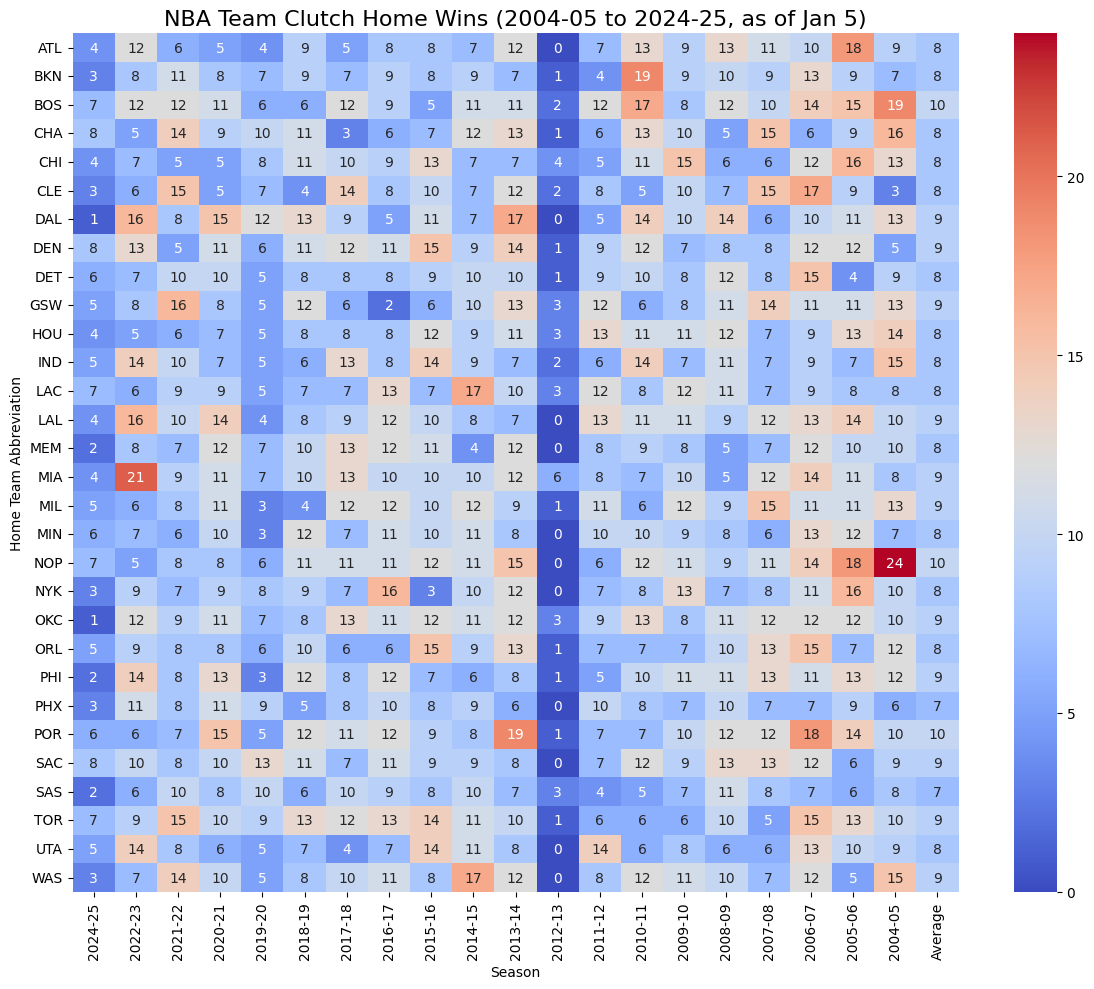

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

# Verify the result
print(team_data_filtered)
print("Length of filtered team data:", len(team_data_filtered))

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100
        teamId       teamCity       teamName teamAbbrev  yearFounded  \
0   1610612766      Charlotte        Hornets      CHA           2014   
31  1610612751       Brooklyn           Nets      BKN           2012   
16  1610612760  Oklahoma City        Thunder      OKC           2008   
50  1610612740    New Orleans       Pelicans        NOP         2002   
11  1610612763        Memphis      Grizzlies      MEM           2001   
5   1610612764     Washington        Wizards      WAS           1997   
15  1610612761        Toront

In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)

# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result)

       gameId   gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
53   22400433 2024-12-28          Utah         Jazz  1610612762  Philadelphia   
79   22400407 2024-12-25        Boston      Celtics  1610612738  Philadelphia   
195  22400322 2024-12-04  Philadelphia        76ers  1610612755       Orlando   
372  22400205 2024-11-10  Philadelphia        76ers  1610612755     Charlotte   
410  22400167 2024-11-04       Phoenix         Suns  1610612756  Philadelphia   

    awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
53         76ers  1610612755        111        114                 -3   
79         76ers  1610612755        114        118                 -4   
195        Magic  1610612753        102        106                 -4   
372      Hornets  1610612766        107        105                  2   
410        76ers  1610612755        118        116                  2   

      season awayteamAbbrev hometeamAbbrev  win  
53   2024-25            

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.
"""  # %%
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-88-e4dd7df4ad47>, line 44)

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012 = season_2012_data['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season: {total_home_wins_2012}")

: 

In [ ]:
"""

: 

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print the result
print(unique_game_ids_by_season)

KeyError: 'season'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)
game_data_filtered['season'] = clutch['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)
game_data_filtered['season'] = clutch['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)
game_data_filtered['season'] = clutch['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)
game_data_filtered['season'] = clutch['gameDate'].apply(calculate_season)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)
game_data_filtered['season'] = clutch['gameDate'].apply(calculate_season)

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print the result
print(unique_game_ids_by_season)

season
1954-55     70
1955-56     93
1956-57     99
1957-58     81
1958-59     77
          ... 
2020-21    287
2021-22    277
2022-23    289
2024-25    138
nan-an     371
Name: gameId, Length: 70, dtype: int64


In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    302
2011-12    248
2012-13     40
2013-14    310
2014-15    291
2015-16    295
2016-17    290
2017-18    275
2018-19    271
2019-20    195
2020-21    287
2021-22    277
2022-23    289
2024-25    138
nan-an     371
Name: gameId, dtype: int64


In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

No kernel connected